In [2]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

In [3]:
data=pd.read_csv('C:/Users/User/machine_learning/data/btc_data.csv')
data.head(5)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [4]:
data.dtypes

Date              object
priceUSD         float64
transactions       int64
size             float64
sentbyaddress      int64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 737, dtype: object

In [5]:
data.isna().sum()

Date             0
priceUSD         0
transactions     0
size             0
sentbyaddress    0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 737, dtype: int64

In [6]:
data.fillna(0, inplace=True)

In [7]:
data.describe()
data.columns

Index(['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress',
       'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=737)

In [8]:
price = data.priceUSD * 10000
print(price)

0            495.0
1            726.0
2            859.0
3            783.0
4            767.0
           ...    
3483    93490000.0
3484    93940000.0
3485    93660000.0
3486    93930000.0
3487    93980000.0
Name: priceUSD, Length: 3488, dtype: float64


In [9]:
test_data=pd.read_csv('C:/Users/User/machine_learning/data/btc_testdata.csv')

In [10]:
test_data.head()
test_prices = (test_data['High']+test_data['Low'])/2

In [11]:
test_prices = test_prices * 10000
print(test_prices)

0       93945000.0
1       92220400.0
2       94325000.0
3       96822200.0
4       97803600.0
          ...     
465    491554300.0
466    501533500.0
467    486519050.0
468    468416950.0
469    444154250.0
Length: 470, dtype: float64


In [12]:
prices = []
prices.extend(price.astype(np.int64))
prices.extend(test_prices.astype(np.int64))
print(prices)

[495, 726, 859, 783, 767, 649, 566, 581, 530, 530, 580, 595, 648, 663, 664, 611, 613, 600, 597, 596, 622, 599, 600, 660, 690, 635, 690, 655, 663, 661, 643, 678, 690, 673, 661, 660, 655, 655, 650, 656, 644, 645, 646, 644, 648, 621, 625, 622, 609, 618, 620, 622, 613, 615, 611, 614, 628, 618, 621, 620, 615, 619, 599, 600, 618, 621, 629, 623, 622, 621, 621, 620, 621, 619, 620, 618, 619, 616, 613, 612, 614, 622, 651, 769, 884, 948, 930, 945, 985, 1030, 1030, 1010, 1019, 1030, 985, 995, 1019, 1050, 1070, 1120, 1110, 1419, 1690, 1790, 1850, 1930, 1930, 1940, 1930, 1930, 2140, 2350, 3260, 4050, 2940, 2370, 2250, 2270, 2490, 2819, 2780, 2740, 2460, 2260, 2450, 2740, 2819, 2770, 2800, 2829, 2829, 2810, 2819, 2839, 2770, 2540, 2190, 2190, 2420, 2510, 2300, 2050, 2150, 2130, 2390, 2130, 2020, 2160, 2140, 2200, 2380, 2420, 2440, 2450, 2450, 2440, 2540, 2500, 2470, 2490, 2490, 2490, 2570, 2580, 2720, 2859, 2960, 3000, 2960, 2970, 2930, 2970, 2940, 2990, 3090, 3160, 3230, 3250, 3270, 3230, 3180, 3590

In [45]:
seq_len = 1024

In [46]:
seq_prices = []
pre_prices = []
j = 1
for j in range(len(data) - seq_len-1):
    seq_prices.append(prices[j:j+seq_len])
    pre_prices.append(prices[j+seq_len+1])
    j=j+1
print(seq_prices)
print(pre_prices)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
train_seq_prices = seq_prices[:int(len(seq_prices)*0.75)]
train_pre_prices = pre_prices[:int(len(seq_prices)*0.75)]
test_seq_prices = seq_prices[int(len(seq_prices)*0.75) + 1:]
test_pre_prices = pre_prices[int(len(seq_prices)*0.75) + 1:]

print(len(train_pre_prices))
print(len(test_pre_prices))
print(len(train_seq_prices))
print(len(test_seq_prices))

1847
615
1847
615


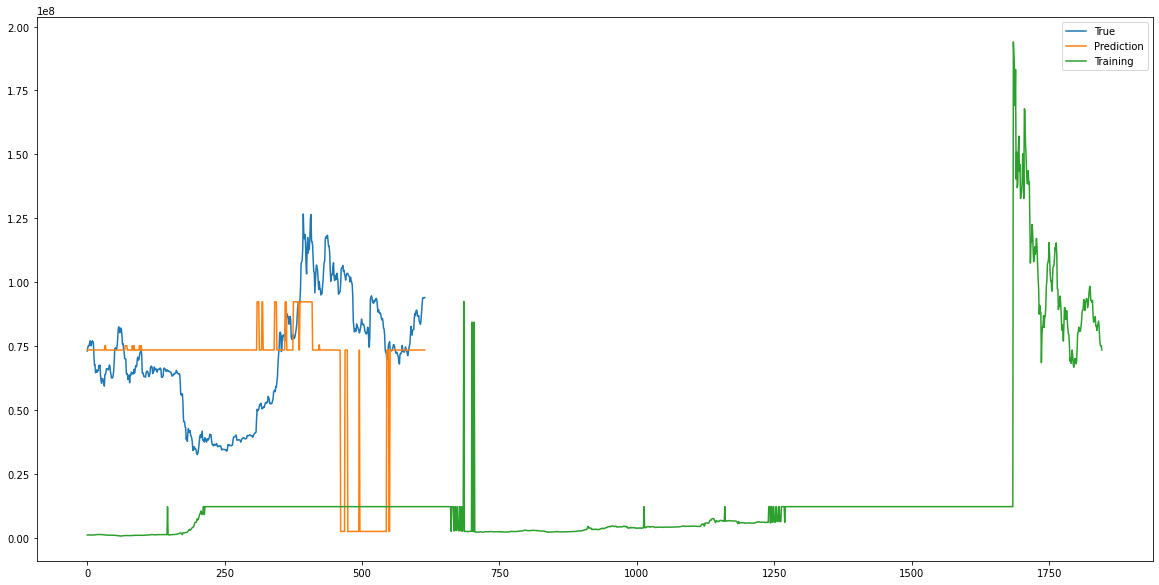

In [37]:
rfc = RandomForestClassifier(max_depth=9, n_estimators=300) 
rfc.fit(train_seq_prices, train_pre_prices)

pred = rfc.predict(test_seq_prices)
pred_train = rfc.predict(train_seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [38]:
print("훈련 세트 정확도: {:.3f}".format(rfc.score(train_seq_prices, train_pre_prices)))
print("테스트 세트 정확도: {:.3f}".format(rfc.score(test_seq_prices, test_pre_prices)))

훈련 세트 정확도: 0.469
테스트 세트 정확도: 0.000


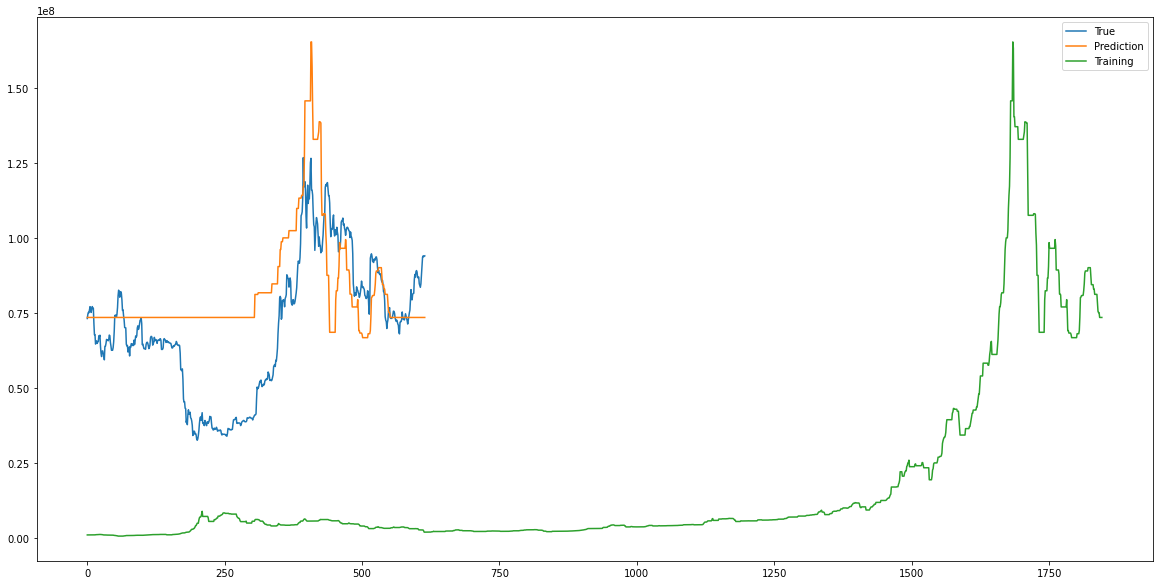

In [39]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_seq_prices, train_pre_prices)

pred = knn.predict(test_seq_prices)
pred_train = knn.predict(train_seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [40]:
print("훈련 세트 정확도: {:.3f}".format(knn.score(train_seq_prices, train_pre_prices)))
print("테스트 세트 정확도: {:.3f}".format(knn.score(test_seq_prices, test_pre_prices)))

훈련 세트 정확도: 0.066
테스트 세트 정확도: 0.000


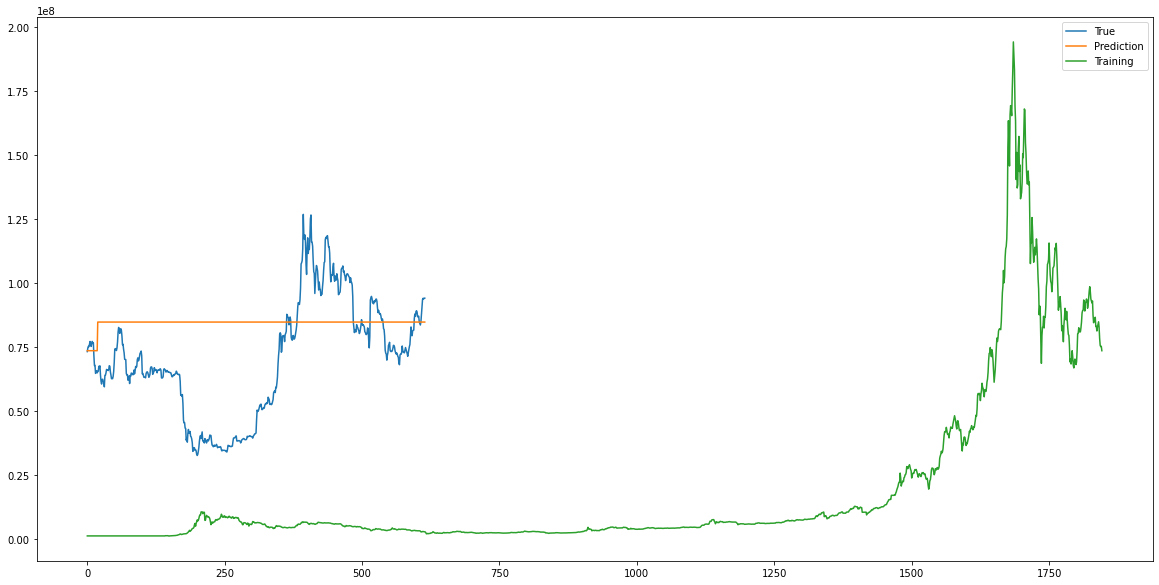

In [44]:
svc = SVC(C=3000)
svc.fit(train_seq_prices, train_pre_prices)

pred = svc.predict(test_seq_prices)
pred_train = svc.predict(train_seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [43]:
print("훈련 세트 정확도: {:.3f}".format(svc.score(train_seq_prices, train_pre_prices)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(test_seq_prices, test_pre_prices)))

훈련 세트 정확도: 0.868
테스트 세트 정확도: 0.000


In [22]:
X_train, X_test, y_train, y_test = train_test_split(seq_prices, pre_prices, test_size = 0.25, random_state = 0)

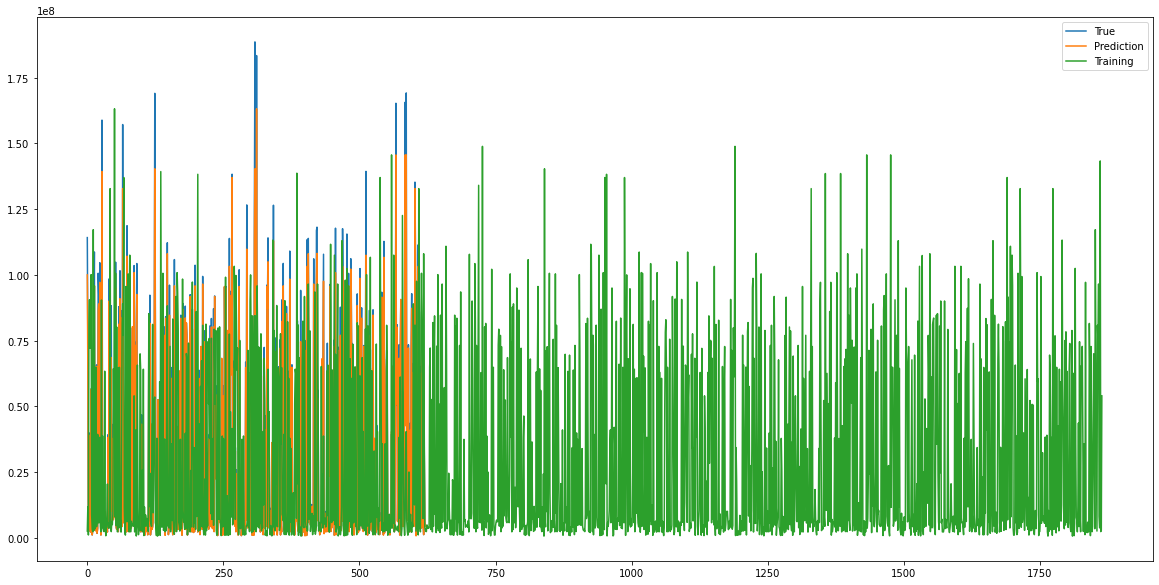

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
pred_train = knn.predict(X_train)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [24]:
print("훈련 세트 정확도: {:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(knn.score(X_test, y_test)))

훈련 세트 정확도: 0.137
테스트 세트 정확도: 0.000


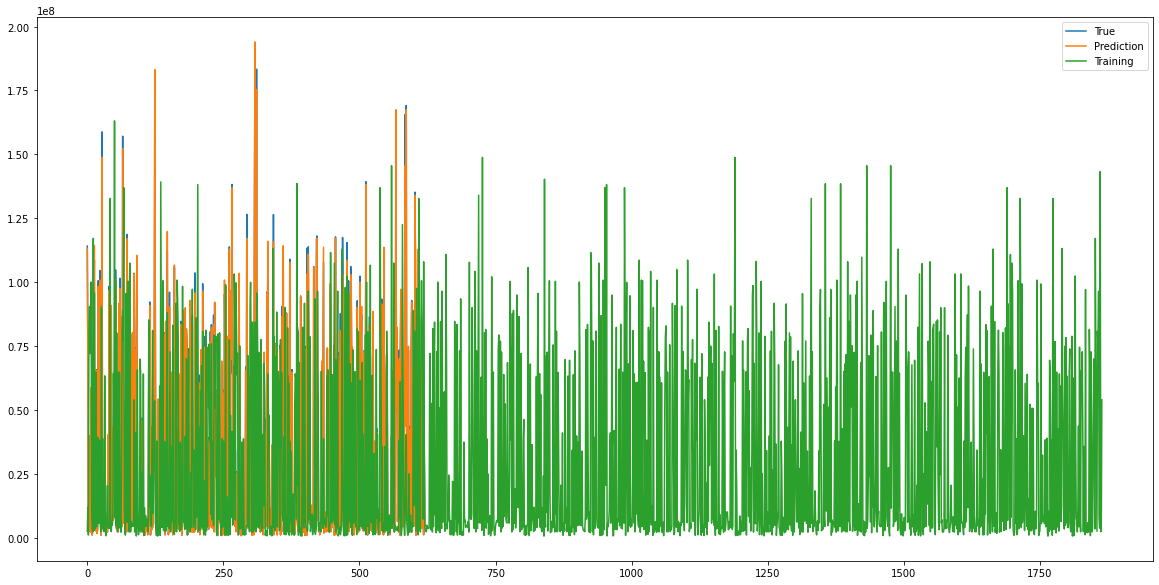

In [25]:
svc = SVC(C=10000)
svc.fit(X_train, y_train)

pred = svc.predict(X_test)
pred_train = knn.predict(X_train)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [26]:
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.977
테스트 세트 정확도: 0.005


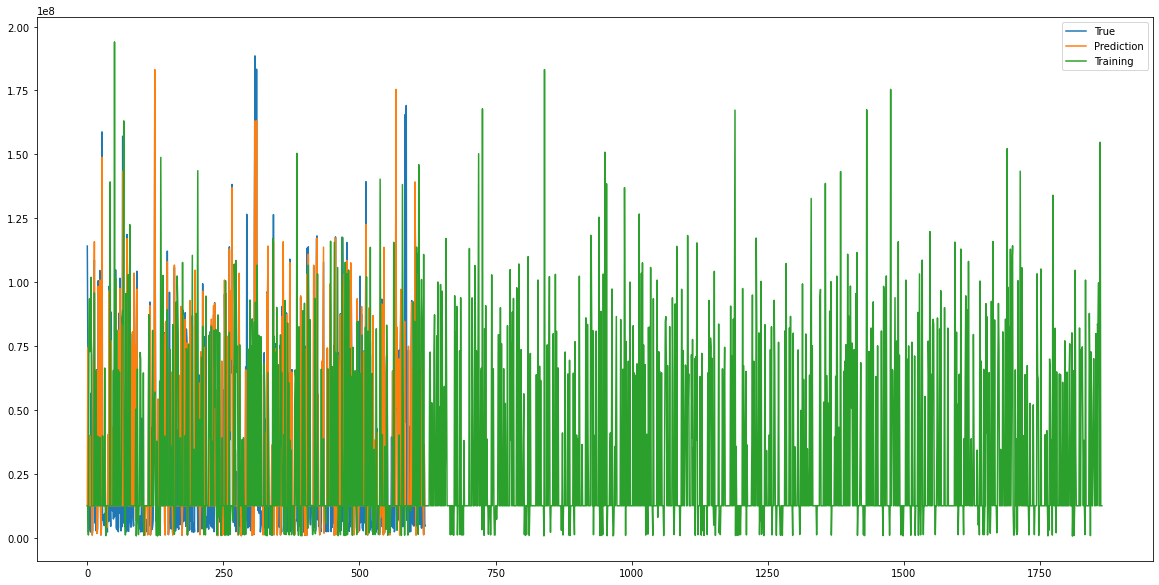

In [27]:
rfc = RandomForestClassifier(max_depth=12, n_estimators=1000) 
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)
pred_train = rfc.predict(X_train)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [28]:
print("훈련 세트 정확도: {:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도: 0.410
테스트 세트 정확도: 0.002
